In [ ]:
import pandas as pd
import numpy as np

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import random as rnd

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('Employee-turnover.csv')

In [ ]:
print(df.columns.values)

['Employee Count' 'Employee ID' 'Department' 'Job Role' 'Gender' 'Age'
 'Marital Status' 'Education' 'Education Field' 'Business Travel'
 'Distance From Home (kms)' 'Job Involvement' 'Job Level'
 'Job Satisfaction' 'Monthly Income (USD)' 'Salary Hike (%)'
 'Stock Option Level' 'Over Time' 'No. of Companies Worked'
 'Total Working Years' 'Years At Company' 'Years In Current Role'
 'Years Since Last Promotion' 'Years With Curr Manager'
 'Environment Satisfaction' 'Training Times Last Year' 'Work Life Balance'
 'Relationship Satisfaction' 'Attrition (Yes/No)']


In [ ]:
df.shape

(1470, 29)

In [ ]:
df.head()

,Employee Count,Employee ID,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,1,1,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,1,2,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,...,10,10,7,1,7,High,3,Better,Very High,No
2,1,4,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,1,5,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,...,8,8,7,3,0,Very High,3,Better,High,No
4,1,7,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,...,6,2,2,2,2,Low,3,Better,Very High,No


In [ ]:
df.isnull().any()

Employee Count                False
Employee ID                   False
Department                    False
Job Role                      False
Gender                        False
Age                           False
Marital Status                False
Education                     False
Education Field               False
Business Travel               False
Distance From Home (kms)      False
Job Involvement               False
Job Level                     False
Job Satisfaction              False
Monthly Income (USD)          False
Salary Hike (%)               False
Stock Option Level            False
Over Time                     False
No. of Companies Worked       False
Total Working Years           False
Years At Company              False
Years In Current Role         False
Years Since Last Promotion    False
Years With Curr Manager       False
Environment Satisfaction      False
Training Times Last Year      False
Work Life Balance             False
Relationship Satisfaction   

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Employee Count              1470 non-null   int64 
 1   Employee ID                 1470 non-null   int64 
 2   Department                  1470 non-null   object
 3   Job Role                    1470 non-null   object
 4   Gender                      1470 non-null   object
 5   Age                         1470 non-null   int64 
 6   Marital Status              1470 non-null   object
 7   Education                   1470 non-null   object
 8   Education Field             1470 non-null   object
 9   Business Travel             1470 non-null   object
 10  Distance From Home (kms)    1470 non-null   int64 
 11  Job Involvement             1470 non-null   object
 12  Job Level                   1470 non-null   int64 
 13  Job Satisfaction            1470 non-null   obje

In [ ]:
df.describe()

,Employee Count,Employee ID,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year
count,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,1.0,1024.865306,36.923810,9.192517,2.063946,6502.931293,14.951701,0.793878,2.689116,11.279592,7.008163,4.229252,2.187755,4.123129,2.799320
std,0.0,602.024335,9.135373,8.106864,1.106940,4707.956783,3.533904,0.852077,2.494231,7.780782,6.126525,3.623137,3.222430,3.568136,1.289271
min,1.0,1.000000,18.000000,1.000000,1.000000,1009.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,491.250000,30.000000,2.000000,1.000000,2911.000000,12.000000,0.000000,1.000000,6.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,1.0,1020.500000,36.000000,7.000000,2.000000,4919.000000,14.000000,1.000000,2.000000,10.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,1.0,1555.750000,43.000000,14.000000,3.000000,8379.000000,17.000000,1.000000,4.000000,15.000000,9.000000,7.000000,3.000000,7.000000,3.000000
max,1.0,2068.000000,60.000000,29.000000,5.000000,19999.000000,25.000000,3.000000,9.000000,40.000000,40.000000,18.000000,15.000000,17.000000,6.000000


In [ ]:
df.describe(include=['O'])

,Department,Job Role,Gender,Marital Status,Education,Education Field,Business Travel,Job Involvement,Job Satisfaction,Over Time,Environment Satisfaction,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
count,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,9,2,3,5,6,3,4,4,2,4,4,4,2
top,Research & Development,Sales Executive,Male,Married,Bachelor,Life Sciences,Travel_Rarely,High,Very High,No,High,Better,High,No
freq,961,326,882,673,572,606,1043,868,459,1054,451,820,426,1233


In [ ]:
#Get a count of the number of employee attrition, the number of employees that stayed (no) and the number that left (yes)
df['Attrition (Yes/No)'].value_counts()

No     1233
Yes     237
Name: Attrition (Yes/No), dtype: int64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Attrition (Yes/No)', ylabel='count'>

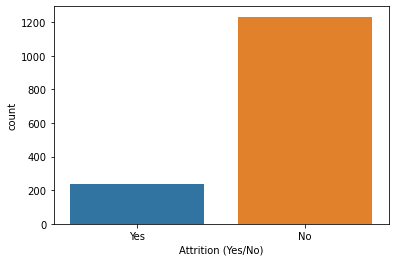

In [ ]:
#Visualize this count 
sns.countplot(df['Attrition (Yes/No)'])

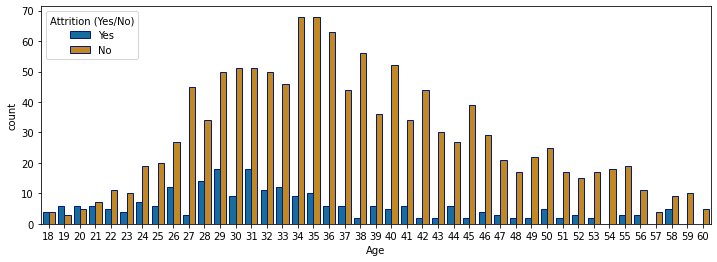

In [ ]:
#Show the number of employees that left and stayed by age
import matplotlib.pyplot as plt
fig_dims = (12, 4)
fig, ax = plt.subplots(figsize=fig_dims)

#ax = axis
sns.countplot(x='Age', hue='Attrition (Yes/No)', data = df, palette="colorblind", ax = ax,  edgecolor=sns.color_palette("dark", n_colors = 1));

# From this we can see the age with the highest count of employee attrition is age 29 & 31. The age with the highest retention is age 34 & 35.


In [ ]:
#Print all of the object data types and their unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print("_________________________________________________________________")

Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
_________________________________________________________________
Job Role : ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: Job Role, dtype: int64
_________________________________________________________________
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
_________________________________________________________________
Marit

Some columns in the data set I don’t think will be needed for training the machine learning model like the number assignment to the employee (which is just some number identification).

The Employee Count , Over Time & Employee ID columns contain only one value in every row, so these columns would not add any additional information to the model. We will remove these columns from the data set.

In [ ]:
#Remove unneeded columns

#Remove the column Employee Count
df = df.drop('Employee Count', axis = 1)  
#Remove the column Employee ID
df = df.drop('Employee ID', axis = 1)  
#Remove the column Over Time
df = df.drop('Over Time', axis = 1) #Contains only the value 'Yes'

In [ ]:
df.head()

,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,Sales,Sales Executive,Female,41,Single,College,Life Sciences,Travel_Rarely,1,High,...,8,6,4,0,5,Medium,0,Bad,Low,Yes
1,Research & Development,Research Scientist,Male,49,Married,Below College,Life Sciences,Travel_Frequently,8,Medium,...,10,10,7,1,7,High,3,Better,Very High,No
2,Research & Development,Laboratory Technician,Male,37,Single,College,Other,Travel_Rarely,2,Medium,...,7,0,0,0,0,Low,3,Bad,Medium,Yes
3,Research & Development,Research Scientist,Female,33,Married,Master,Life Sciences,Travel_Frequently,3,High,...,8,8,7,3,0,Very High,3,Better,High,No
4,Research & Development,Laboratory Technician,Male,27,Married,Below College,Medical,Travel_Rarely,2,High,...,6,2,2,2,2,Low,3,Better,Very High,No


In [ ]:
#Get the correlation of the columns
df.corr()

,Age,Distance From Home (kms),Job Level,Monthly Income (USD),Salary Hike (%),Stock Option Level,No. of Companies Worked,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Training Times Last Year
Age,1.000000,-0.001686,0.509604,0.497855,0.040287,0.037510,0.299358,0.680381,0.311309,0.212901,0.216513,0.202089,-0.019621
Distance From Home (kms),-0.001686,1.000000,0.005303,-0.017014,0.015960,0.044872,-0.027640,0.004628,0.009508,0.018845,0.010029,0.014406,-0.036942
Job Level,0.509604,0.005303,1.000000,0.950300,0.010361,0.013984,0.142812,0.782208,0.534739,0.389447,0.353885,0.375281,-0.018191
Monthly Income (USD),0.497855,-0.017014,0.950300,1.000000,0.015050,0.005408,0.149919,0.772893,0.514285,0.363818,0.344978,0.344079,-0.021736
Salary Hike (%),0.040287,0.015960,0.010361,0.015050,1.000000,0.041906,-0.000315,0.019554,-0.002812,0.031862,0.001454,0.016776,0.012065
Stock Option Level,0.037510,0.044872,0.013984,0.005408,0.041906,1.000000,0.031647,0.010136,0.015058,0.050818,0.014352,0.024698,0.011274
No. of Companies Worked,0.299358,-0.027640,0.142812,0.149919,-0.000315,0.031647,1.000000,0.238689,-0.118331,-0.090788,-0.035758,-0.110889,-0.062599
Total Working Years,0.680381,0.004628,0.782208,0.772893,0.019554,0.010136,0.238689,1.000000,0.628133,0.460365,0.404858,0.459188,-0.035662
Years At Company,0.311309,0.009508,0.534739,0.514285,-0.002812,0.015058,-0.118331,0.628133,1.000000,0.758754,0.618409,0.769212,0.003569
Years In Current Role,0.212901,0.018845,0.389447,0.363818,0.031862,0.050818,-0.090788,0.460365,0.758754,1.000000,0.548056,0.714365,-0.005738


Let’s get a better visual of the correlation by using a heat map.

#Visualize the correlation

<AxesSubplot:>

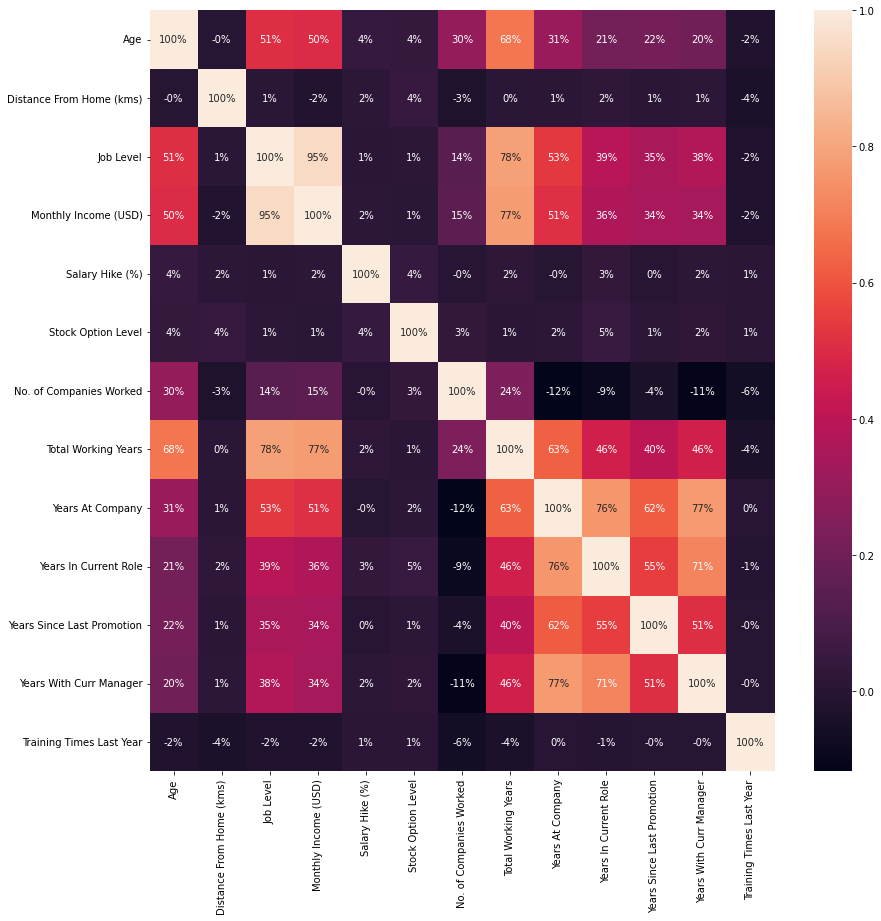

In [ ]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

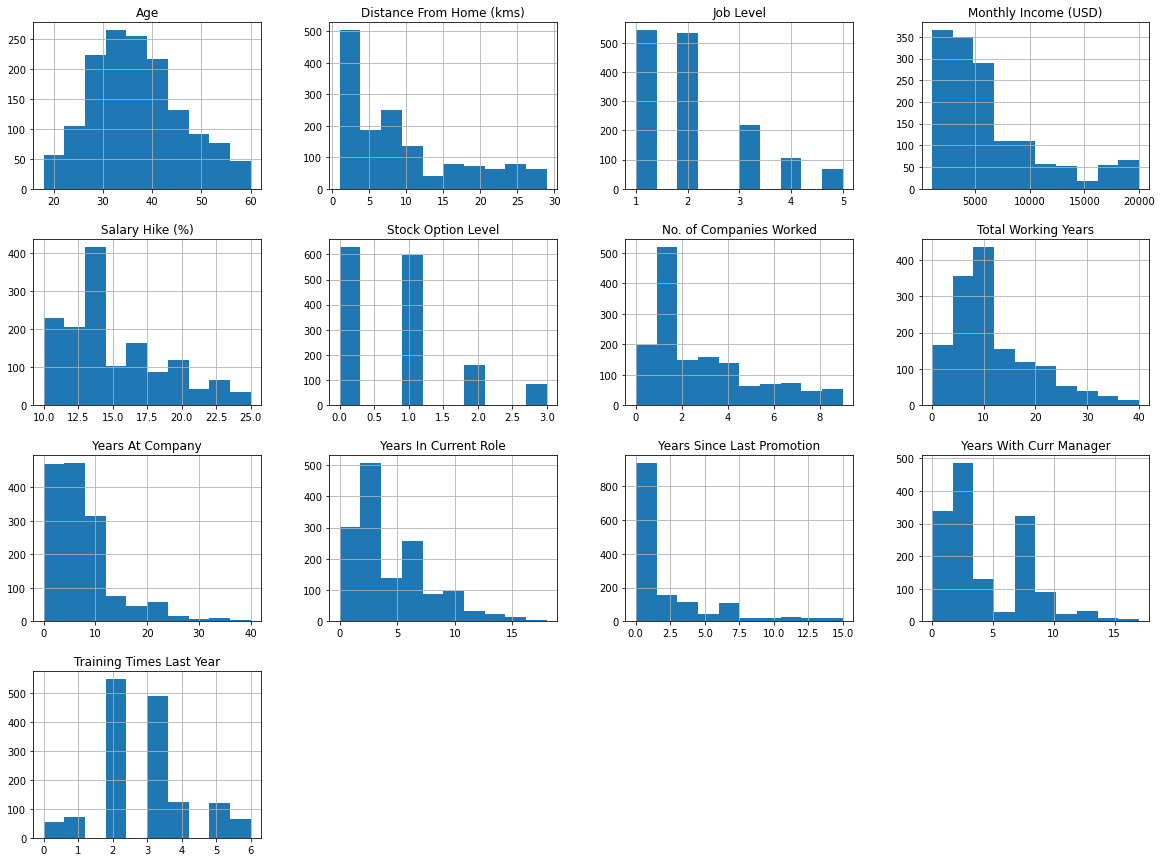

In [ ]:
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

# preprocessing of data

In [ ]:
#Transform non-numeric columns into numerical columns
from sklearn.preprocessing import LabelEncoder

for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])
      

C:\Users\Dell\AppData\Local\Temp\ipykernel_22168\1366629414.py:5: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [ ]:
df.head()

,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
0,2,7,0,23,2,2,1,2,0,0,...,8,6,4,0,5,2,0,0,1,1
1,1,6,1,31,1,1,1,1,7,2,...,10,10,7,1,7,0,3,2,3,0
2,1,2,1,19,2,2,4,2,1,2,...,7,0,0,0,0,1,3,0,2,1
3,1,6,0,15,1,4,1,1,2,0,...,8,8,7,3,0,3,3,2,0,0
4,1,2,1,9,1,1,3,2,1,0,...,6,2,2,2,2,1,3,2,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Department                  1470 non-null   int32
 1   Job Role                    1470 non-null   int32
 2   Gender                      1470 non-null   int32
 3   Age                         1470 non-null   int64
 4   Marital Status              1470 non-null   int32
 5   Education                   1470 non-null   int32
 6   Education Field             1470 non-null   int32
 7   Business Travel             1470 non-null   int32
 8   Distance From Home (kms)    1470 non-null   int64
 9   Job Involvement             1470 non-null   int32
 10  Job Level                   1470 non-null   int64
 11  Job Satisfaction            1470 non-null   int32
 12  Monthly Income (USD)        1470 non-null   int64
 13  Salary Hike (%)             1470 non-null   int64
 14  Stock Op

In [ ]:
#Get the correlation of the columns
df.corr()

,Department,Job Role,Gender,Age,Marital Status,Education,Education Field,Business Travel,Distance From Home (kms),Job Involvement,...,Total Working Years,Years At Company,Years In Current Role,Years Since Last Promotion,Years With Curr Manager,Environment Satisfaction,Training Times Last Year,Work Life Balance,Relationship Satisfaction,Attrition (Yes/No)
Department,1.000000,0.662431,-0.041583,-0.031882,0.056073,0.029469,0.013720,-0.009044,0.017225,-0.039241,...,-0.015685,0.023308,0.056315,0.040061,0.034282,0.014225,0.036875,0.009811,0.003054,0.063991
Job Role,0.662431,1.000000,-0.039723,-0.122427,0.067957,0.005481,0.015599,0.002724,-0.001015,-0.031811,...,-0.145392,-0.082870,-0.028354,-0.046384,-0.041150,0.015982,0.001342,0.011010,0.034202,0.067151
Gender,-0.041583,-0.039723,1.000000,-0.036311,-0.047183,0.010168,-0.002504,-0.032981,-0.001851,-0.002516,...,-0.046875,-0.030797,-0.041483,-0.026985,-0.030599,0.021320,-0.038787,-0.021822,0.022645,0.029453
Age,-0.031882,-0.122427,-0.036311,1.000000,-0.095029,0.151695,-0.040873,0.024751,-0.001686,-0.029606,...,0.680409,0.309796,0.212901,0.216513,0.202089,0.012615,-0.019621,0.053259,0.017829,-0.159205
Marital Status,0.056073,0.067957,-0.047183,-0.095029,1.000000,-0.021771,0.014420,0.024001,-0.014437,0.004174,...,-0.078032,-0.060648,-0.065822,-0.030915,-0.038570,0.014287,0.010629,-0.093002,0.037633,0.162070
Education,0.029469,0.005481,0.010168,0.151695,-0.021771,1.000000,-0.016100,-0.023390,0.002279,-0.007728,...,0.079826,0.050687,0.018309,0.023356,0.042929,0.010788,-0.019750,-0.022534,0.030703,-0.036376
Education Field,0.013720,0.015599,-0.002504,-0.040873,0.014420,-0.016100,1.000000,0.023724,0.002013,-0.011226,...,-0.027833,-0.018987,-0.010506,0.002326,-0.004130,0.006212,0.049195,-0.007513,0.018191,0.026846
Business Travel,-0.009044,0.002724,-0.032981,0.024751,0.024001,-0.023390,0.023724,1.000000,-0.024469,0.007908,...,0.034144,-0.014720,-0.011497,-0.032591,-0.022636,0.032230,0.015240,0.000098,-0.029276,0.000074
Distance From Home (kms),0.017225,-0.001015,-0.001851,-0.001686,-0.014437,0.002279,0.002013,-0.024469,1.000000,-0.003235,...,0.004560,0.009038,0.018845,0.010029,0.014406,-0.003214,-0.036942,-0.000479,0.001923,0.077924
Job Involvement,-0.039241,-0.031811,-0.002516,-0.029606,0.004174,-0.007728,-0.011226,0.007908,-0.003235,1.000000,...,-0.004596,0.016114,-0.002043,-0.015023,0.014039,-0.018335,-0.034024,0.016453,-0.001855,0.008467


<AxesSubplot:>

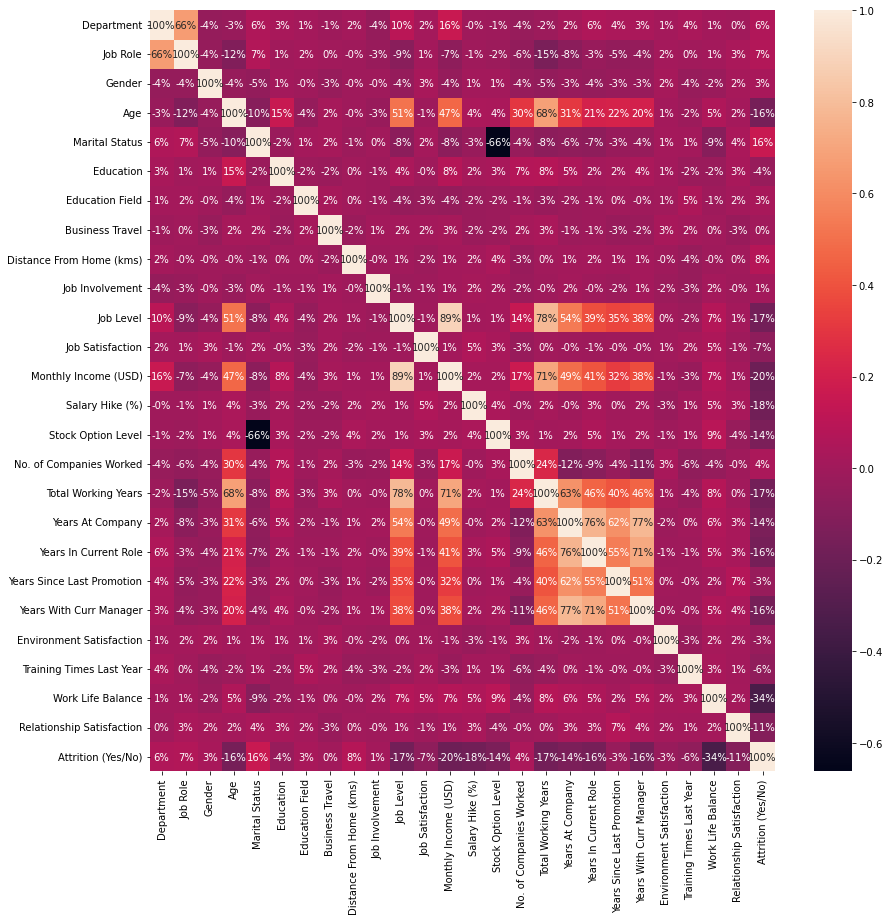

In [ ]:
plt.figure(figsize=(14,14))  #14in by 14in
sns.heatmap(df.corr(), annot=True, fmt='.0%')

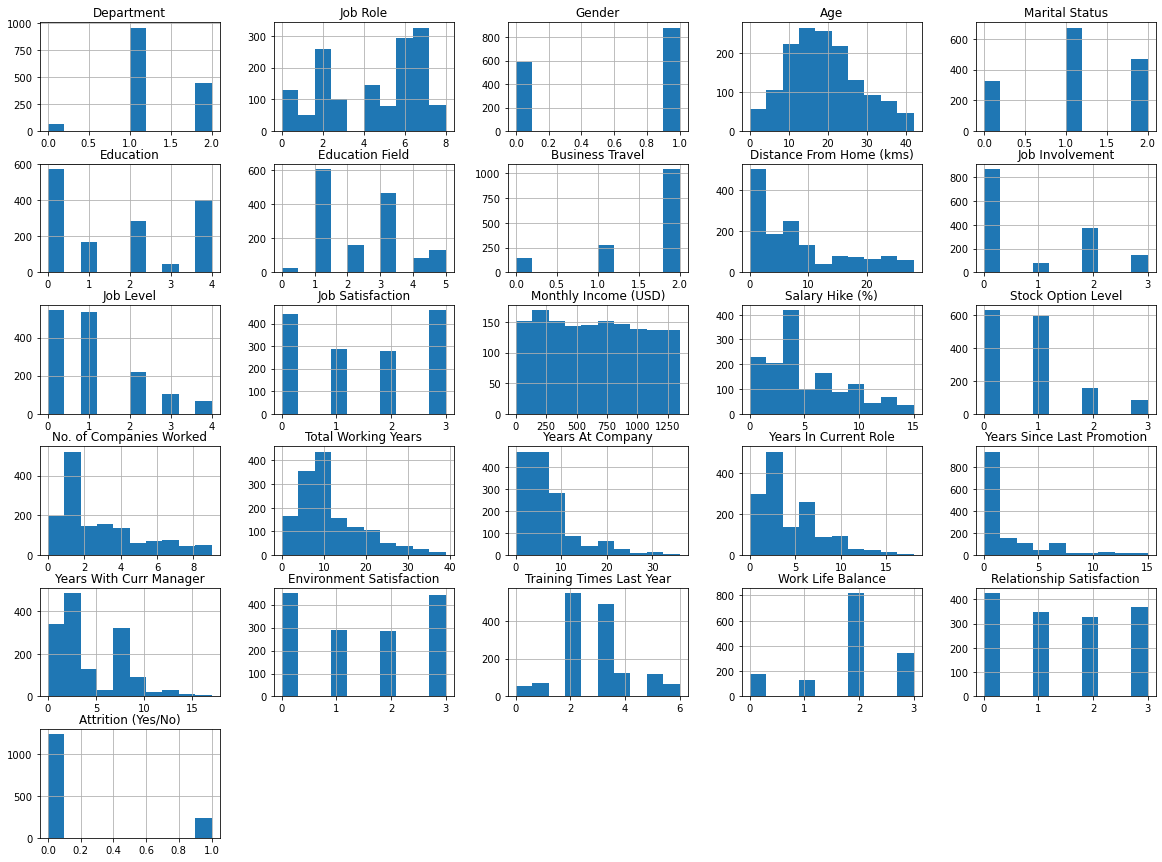

In [ ]:
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

Analyze by binary relationship table From above we see "Attritiont" with "Job Satisfaction", "Monthly Income (USD)" and "stock option" has negative correlation, "Attrition" and "marital status" have strong positive correlation. We can further discover the precise relationship below.

In [ ]:
df[['Attrition (Yes/No)', 'Job Satisfaction']].groupby(['Attrition (Yes/No)'], as_index=False).mean().sort_values(by='Job Satisfaction', ascending=False)

,Attrition (Yes/No),Job Satisfaction
0,0,1.550689
1,1,1.324895


In [ ]:
df[['Attrition (Yes/No)', 'Monthly Income (USD)']].groupby(['Attrition (Yes/No)'], as_index=False).mean().sort_values(by='Monthly Income (USD)', ascending=False)

,Attrition (Yes/No),Monthly Income (USD)
0,0,688.451744
1,1,481.147679


In [ ]:
df[['Attrition (Yes/No)', 'Work Life Balance']].groupby(['Work Life Balance'], as_index=False).mean().sort_values(by='Attrition (Yes/No)', ascending=False)

,Work Life Balance,Attrition (Yes/No)
0,0,0.666667
3,3,0.161290
2,2,0.070732
1,1,0.045455


In [ ]:
df[['Attrition (Yes/No)', 'Years At Company']].groupby(['Years At Company'], as_index=False).mean().sort_values(by='Attrition (Yes/No)', ascending=False)

,Years At Company,Attrition (Yes/No)
36,36,1.000000
23,23,0.500000
0,0,0.363636
1,1,0.345029
31,31,0.333333
30,30,0.333333
2,2,0.212598
32,32,0.200000
4,4,0.172727
24,24,0.166667


Visualize and convert continuous data to discrete Other than the corerlation with binary "Attrition" factor, exploring correlation between other factors can also give us very constructive information,

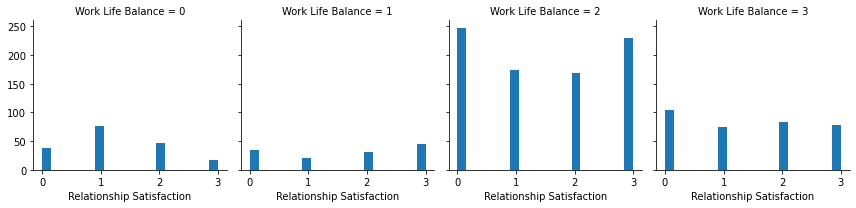

In [ ]:
g = sns.FacetGrid(df, col='Work Life Balance')
g.map(plt.hist, 'Relationship Satisfaction', bins=20)

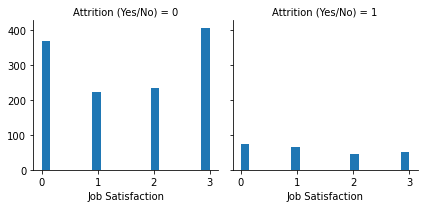

In [ ]:
g = sns.FacetGrid(df, col='Attrition (Yes/No)')
g.map(plt.hist, 'Job Satisfaction', bins=20)

In [ ]:
nHead = int(len(df)*0.85)
nTail = int(len(df)*0.15)
X_train = df.drop("Attrition (Yes/No)", axis=1).head(nHead)
X_test  = df.drop("Attrition (Yes/No)", axis=1).tail(nTail)
Y_train = df["Attrition (Yes/No)"].head(nHead)
Y_test = df["Attrition (Yes/No)"].tail(nTail)
X_train.shape, X_test.shape

((1249, 25), (220, 25))

In [ ]:
svc = SVC()
svc.fit(X_train, Y_train)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
acc_svc

85.45

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
acc_knn

80.45

In [ ]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
acc_decision_tree = round(decision_tree.score(X_test, Y_test) * 100, 2)
acc_decision_tree

83.18

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)
logistic_acc = model.score(X_train, Y_train)
print("The Accuracy for Training Set is {}".format(logistic_acc*100))

The Accuracy for Training Set is 87.99039231385109


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
 
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  acc_forest = round(forest.score(X_test, Y_test) * 100, 2)
  acc_forest

88.64

# Model evaluation

In [ ]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, logistic_acc, acc_forest, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,88.640000
0,Support Vector Machines,85.450000
4,Decision Tree,83.180000
1,KNN,80.450000
2,Logistic Regression,0.879904


In [ ]:
#Show the confusion matrix and accuracy for  the model on the test data
#Classification accuracy is the ratio of correct predictions to total predictions made.

In [ ]:

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))
print()# Print a new line

[[184   4]
 [ 21  11]]
Model Testing Accuracy = "0.8863636363636364!"



In [ ]:
# Return the feature importances (the higher, the more important the feature).
importances = pd.DataFrame({'feature':df.iloc[:, 1:df.shape[1]].columns,'importance':np.round(forest.feature_importances_,3)}) #Note: The target column is at position 0
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Relationship Satisfaction,0.160
Attrition (Yes/No),0.109
Stock Option Level,0.091
Marital Status,0.064
Salary Hike (%),0.063
Years In Current Role,0.047
Job Involvement,0.046
Total Working Years,0.039
Years At Company,0.036


<AxesSubplot:xlabel='feature'>

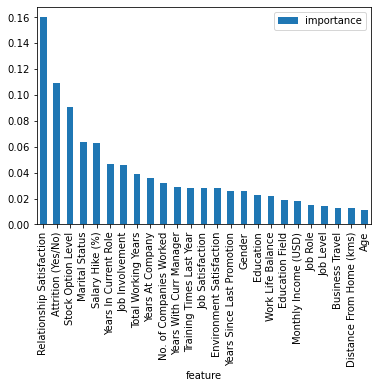

In [ ]:
#Visualize the importance
importances.plot.bar()

# Conclusion

Relationship Satisfaction appears to be the most important feature followed by the Stock Option Level, Marital Status, and Salary Hike (%). Seeing this result makes me want to see if people with a higher Relationship Satisfaction are less likely to leave than someone with a lower Relationship Satisfaction.

I could also do some more analysis on the employees Stock Option Level as it seems their may be some Stock Option Level that the employee is most likely to leave.

Maybe with some more analysis on the data and tweaking of the program, I can improve this models performance and accuracy score.